# Introduction à `julia` pour les statistiques

Les fichiers sont disponibles ici : 

[https://gitlab.irit.fr/toc/ens-n7/tutoriels/etudiants](https://gitlab.irit.fr/toc/ens-n7/tutoriels/etudiants)

dans le répertoire `src/julia`

`slides-CFIES-nov22.pdf`: Les quelques slides

`CFIES_nov_2022.ipynb`: notebook de cette présentation

## Introduction au langage `julia`

La syntaxe est très agréable pour un mathématicien
* Caractères UTF8
* Type matrice, vecteur
* [] pour les tableaux et () pour les fonctions

### Caractère UTF8


In [1]:
α = 1.    # \alpha + TAB
println("α = ", α)
aᵢ = 2    # a\_i + TAB

α = 1.0


2

### `julia` est un langage typé


In [2]:
a = 1
println("typeof(a) = ", typeof(a))
b = 1.
println("typeof(b) = ", typeof(b))

typeof(a) = Int64
typeof(b) = Float64


### Les tableaux

In [42]:
# v est un vecteur d'entier (tableau à 1 dimension)
v = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [4]:
# v2 est une matrice
v2 = [1 2 3]

1×3 Matrix{Int64}:
 1  2  3

In [5]:
# A est une matrice de réels (tableau à 2 dimensions)
A = [1 2 3;4 5 6.]

2×3 Matrix{Float64}:
 1.0  2.0  3.0
 4.0  5.0  6.0

In [6]:
typeof(A)

Matrix{Float64} (alias for Array{Float64, 2})

In [7]:
# A est un tableau à 3 dimensions
A = Array{Float64, 3}(undef, 2, 3,2) 

2×3×2 Array{Float64, 3}:
[:, :, 1] =
 2.0e-323  1.5e-323  2.44474e-314
 4.0e-323  1.6e-322  4.94e-322

[:, :, 2] =
 4.94e-321   1.0e-322     1.5e-323
 1.235e-321  2.1267e-314  1.6e-322

**Opérations vectoriels**

In [50]:
A = [1. 2 3 ; 4 5 6 ; 7 8 9]
B = [1 0 0 ; 0 1 0 ; 0 0 1]
println("A*B = ", A*B)           # produit matriciel
println("A .* B = ", A .* B)     # opération terme à terme

A*B = [1.0 2.0 3.0; 4.0 5.0 6.0; 7.0 8.0 9.0]
A .* B = [1.0 0.0 0.0; 0.0 5.0 0.0; 0.0 0.0 9.0]


**Des tableaux comme en python**

In [51]:
B = A
B[2,1] = 999    # Comme en python A va être modifiée
println("A = ", A)
println("objectid(A) = ", objectid(A))
println("objectid(B) = ", objectid(B))
a = 1.
b = a
b = 2.
println("objectid(a) = ", objectid(a))
println("objectid(b) = ", objectid(b))

A = [1.0 2.0 3.0; 999.0 5.0 6.0; 7.0 8.0 9.0]
objectid(A) = 14072187456381207373
objectid(B) = 14072187456381207373
objectid(a) = 7025260775834392554
objectid(b) = 6474972760534518197


### Les fonctions
#### Définition et types dans les fonctions
* () pour les fonctions
* [] pour les tableaux

In [10]:
function fct(x)
    return 2*x+1
end

fct (generic function with 1 method)

In [11]:
fct = [3,6]

LoadError: invalid redefinition of constant fct

In [12]:
"""
   calcul le nombre d'éléments dans t < à une valeur x
"""
function empirique(t::Vector{<:Real}, x::Real)::Int
    return sum(t.<x)
end
println("empirique([1.,2,3],1.5) = ", empirique([1.,2,3],1.5))

empirique([1.,2,3],1.5) = 1


In [13]:
println("empirique([1.+2im,2,3],1.5) = ", empirique([1.,2+2im,3],1.5))

LoadError: MethodError: no method matching empirique(::Vector{ComplexF64}, ::Float64)
[0mClosest candidates are:
[0m  empirique([91m::Vector{<:Real}[39m, ::Real) at In[12]:4

In [14]:
function fct1_1(x::Vector{<:Real})
    return 1
end
println(fct1_1([1]))
fct1_1(1)

1


LoadError: MethodError: no method matching fct1_1(::Int64)
[0mClosest candidates are:
[0m  fct1_1([91m::Vector{<:Real}[39m) at In[14]:1

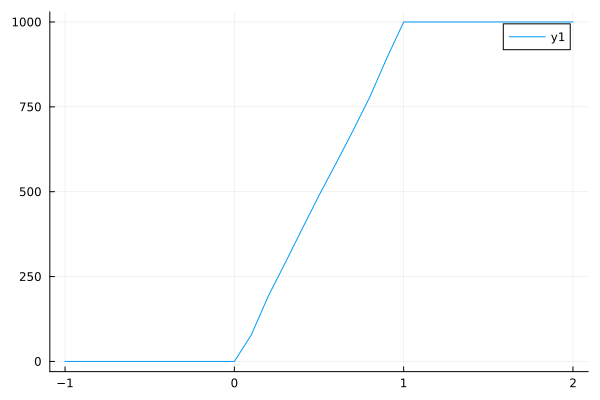

In [15]:
empirique2(t,x) = sum(t.<x) # calcul le nombre d'éléments dans t < à une valeur x
u = rand(1000)
x = -1:0.1:2
F(x) = empirique2(u,x)
using Plots
plot(x,F)

#### Une fonction est un "objet" comme un autre

In [16]:
fct_g(x) = x^2
println("fct_g(5) = ", fct_g(5))
println("fct_g(abc) = ", fct_g("abc"))

fct_g(5) = 25
fct_g(abc) = abcabc


In [17]:
δ(f) = (x -> f(x+1)-f(x))
function δ1(f)
    function diff(x)
        return f(x+1)-f(x)
    end
    return diff
end
h = δ(fct_g)
println("h(1) = ", h(1))
h1 = δ1(fct_g)
println("h(1) = ", h1(1))

h(1) = 3
h(1) = 3


**On a automatiquement la version vectoriel de la fonction**

In [18]:
println("h1.([1 10 100 1000]) = ", h1.([1 10 100 1000]))   # la fonction vectorielle est définie

h1.([1 10 100 1000]) = [3 21 201 2001]


### Multiple dispatch

In [19]:
function fct1(x::Real)
    return x+1
end
fct1

fct1 (generic function with 1 method)

In [20]:
function fct1(x::Int)
    return x-1
end
println("fct1(1) = ", fct1(1))   # appel sur un entier
println("fct1(1.) = ", fct1(1.)) # appel sur un réel
fct1

fct1(1) = 0
fct1(1.) = 2.0


fct1 (generic function with 2 methods)

## Exemple de bibliothèque

### Introduction

Un nombre de bibliothèques (Packages) impressionnant : [https://julialang.org/packages/](https://julialang.org/packages/)

### Distributions Package
#### Distribution triangulaire
On considère la distribution de fonction de densité
$$f(x) = \begin{cases}
x\quad\textrm{pour}\quad x\in[0,1]\\
2-x\quad\textrm{pour}\quad x\in[1,2]\\
0\quad\textrm{sinon}
\end{cases}$$

type de dist = TriangularDist{Float64}
params(dist) = (0.0, 2.0, 1.0)


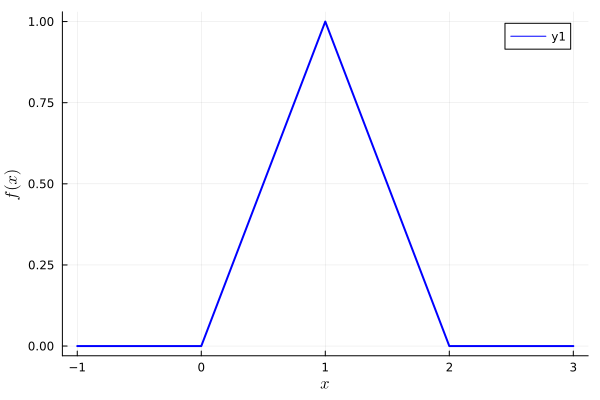

In [52]:
using Distributions
using Plots
using LaTeXStrings
a = 0; b = 2;
dist = TriangularDist(a,b,1)  # min = a; max = b; mode = 1
println("type de dist = ",typeof(dist))
println("params(dist) = ", params(dist))
pdf_dist(x) = pdf(dist,x)
x_grid = a-1:0.1:b+1
y_grid = pdf_dist.(x_grid)       # fonction vectorisée
# plot de la fonction de densité
p1 = plot(x_grid, y_grid, color = :blue, linewidth=2, xlabel=(L"x"), ylabel=(L"f(x)")) 

**Plot de la fonction de répartition $F(x)=P(X\leq x)$ et de la fonction inverse**

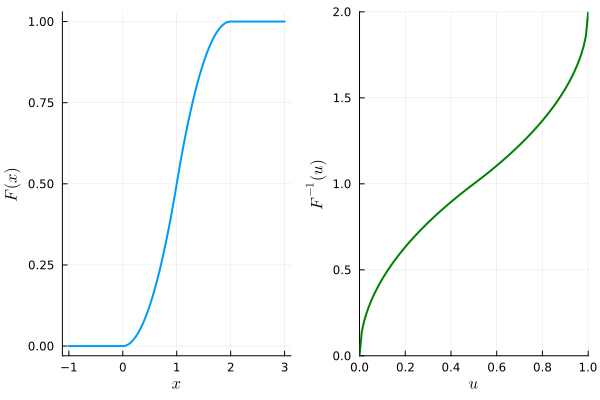

In [22]:
# plot de la fonction de répartition F(x)
p2 = plot(a-1:0.01:b+1, x->cdf(dist,x), linewidth=2, xlabel=(L"x"), ylabel=(L"F(x)"))  
# plot de la fonction inverse
p3 = plot(0:0.01:1, x->quantile(dist,x), xlims=(0,1), ylims=(0,2), color = :green, linewidth=2, xlabel=(L"u"), ylabel=(L"F^{-1}(u)"))
plot(p2,p3, legend = false)

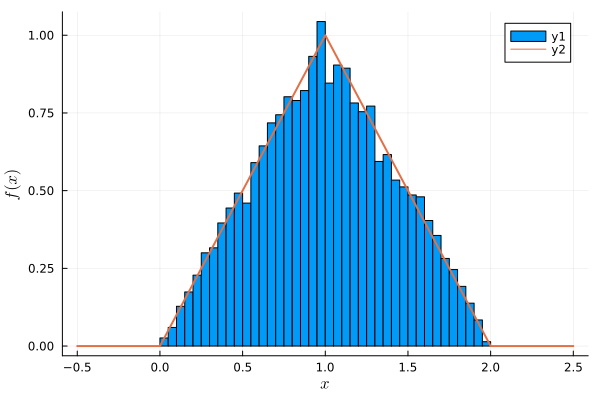

In [53]:
# Génération de nombres aléatoires
t = rand(dist,10000)
histogram(t,normalize=true) # normalize=true pour ajouter la fonction de densité
plot!(a-0.5:0.1:b+0.5, x->pdf.(dist,x), linewidth=2, xlabel=(L"x"), ylabel=(L"f(x)"))   

#### Distribution discrète


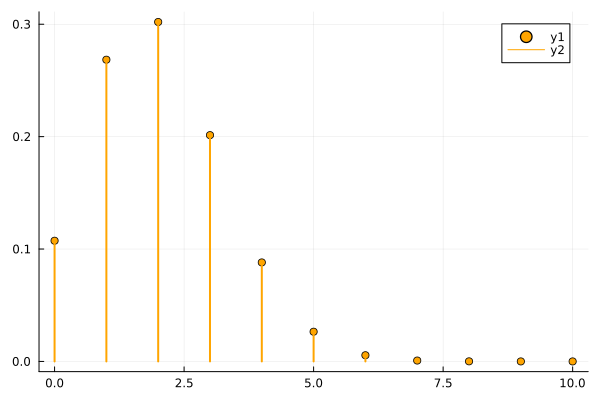

In [24]:
n, p, N = 10, 0.2, 10^3
bDist = Binomial(n,p)
xgrid = 0:n
plot(xgrid,pdf.(bDist,xgrid), color=:orange, seriestype = :scatter)
plot!(xgrid,pdf.(bDist,xgrid), line = :stem, linewidth=2, color=:orange)

#### 

## Différentiation automatique

In [25]:
using ForwardDiff

fct(x) = [cos(2*pi*x[1])*x[2],x[1]*x[2]]
∇fct(x) = ForwardDiff.jacobian(fct, x)
x0 = [1,2]
println(fct(x0))
∇fct(x0)

[2.0, 2.0]


2×2 Matrix{Float64}:
 3.07787e-15  1.0
 2.0          1.0

### Algorithme de Newton

On cherche
$$(P)\left\{\begin{array}{l}Min\quad f(x)\\
x\in \mathbf{R}^n
\end{array}\right.$$

**Résolution de $\nabla f(x) = 0$ par la méthode de Newton**

A chaque itération on calcule la solution du système linéaire : 

$\nabla ^2f(x_{k})d =-\nabla f(x_{k})$

et on pose

$x_{k+1} = x_k +  d$

jusqu'à ce qu'un des critères d'arrêt soit vérifié

**Remarque** :

En `julia` pour résoudre $Ax=b$ on écrit

x = A\b

In [58]:
using LinearAlgebra
using ForwardDiff

"""
   Résout par l'algorithme de Newton Min f(x)
   Cas où f est une fonction de R^n à valeur dans R
   Entrée
   ------
   f       : fonction de R^n à valeurs dans R
   x0      : point de départ
             vecteur de Réels
   options : paramètres d'option
             Tol_Abs  = options[1]
             Tol_Rel  = options[2]
             nbit_max = options[3]
   Sortie
   ------
   x_sol   : solution
             vecteur de Réels
   f_sol   : f(x_sol)
             Réel
   ∇f_sol  : ∇f(x_sol)
             vecteur de Réels
   ∇²f_sol : ∇²f(x_sol)
             matrice de Réels
   nbiter  : nombre d'itérations
             Integer
"""
function algo_Newton(f,x0::Vector{<:Real},options=[])
    # Définition des fonctions gardient et hessienne
    ∇f(x) = ForwardDiff.gradient(f, x)

    ∇²f(x) = ForwardDiff.hessian(f, x)

    if options == []
        Tol_Abs  = sqrt(eps())
        Tol_Rel  = Tol_Abs
        nbit_max = 100*length(x0)
    else
        Tol_Abs  = options[1]
        Tol_Rel  = options[2]
        nbit_max = options[3]
    end

    norm∇f₀ = norm(∇f(x0))
    continuer = (norm∇f₀ > Tol_Abs)
    xₖ = x0
    k = 0
    while continuer == true
        dₖ = -∇²f(xₖ) \ ∇f(xₖ)    # On résout ∇²f(xₖ)*d + ∇f(xₖ) = 0
        k = k+1
        xₖ = xₖ + dₖ
        if (norm(∇f(xₖ)) < max(Tol_Abs, Tol_Rel* norm∇f₀))
            continuer = false  
        elseif (k == nbit_max)
            continuer = false
        end
    end
    return xₖ, f(xₖ), ∇f(xₖ), ∇²f(xₖ), k  
end

algo_Newton

In [59]:
"""
   Résout par l'algorithme de Newton Min f(x)
   Cas où f est une fonction de R dans R
"""
function algo_Newton(f,x0::Real,options)
    f_vec(x) = f(x[1])    # Le paramètre de f doit être un vecteur
    x_sol, fun_sol, ∇fun_sol, ∇²fun_sol, nbit = algo_Newton(f_vec,[x0],options)
    return x_sol[1], fun_sol, ∇fun_sol[1], ∇²fun_sol[1,1], nbit
end

algo_Newton

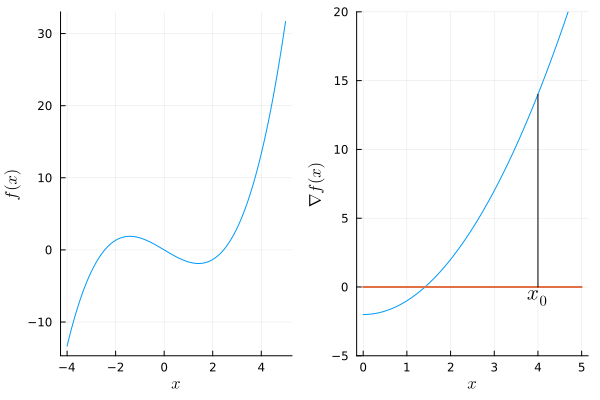

In [68]:
using Plots
using LaTeXStrings
# Exemple Min f(x), f fonction de R à valeurs dans R

fun(x) = (x^3)/3 - 2*x

a = -4; b = 5;
x = range(a, b, length=100)
p1 = plot(x,fun,xlabel = (L"x"), ylabel = (L"f(x)"), legend = false)
∇fun(x) = ForwardDiff.derivative(fun,x)  # pour définir une fonction de R dans R
a=0
x = range(a, b, length=100)
p2 = plot(x,∇fun,xlabel = (L"x"), ylabel = (L"\nabla f(x)"), legend = false)
plot!(p2,[a,b],[0,0], linewidth=2)
x₀ = 4.
plot!(p2,[x₀,x₀],[0,∇fun(x₀)], color=:black)
plot!(p2, annotation=(x₀, -0.8, L"x_0"), ylims=(-5,20))
plot(p1,p2)

(2.25, -0.703125, 3.0625, 4.5, 1)
(1.5694444444444444, -1.850293459933699, 0.46315586419753085, 3.138888888888889, 2)


┌ Info: Saved animation to /Users/gergaud/Control/Publi/CFIES2022/slides/Newton.gif
└ @ Plots /Users/gergaud/.julia/packages/Plots/kYFLA/src/animation.jl:149


Plots.AnimatedGif("/Users/gergaud/Control/Publi/CFIES2022/slides/Newton.gif")
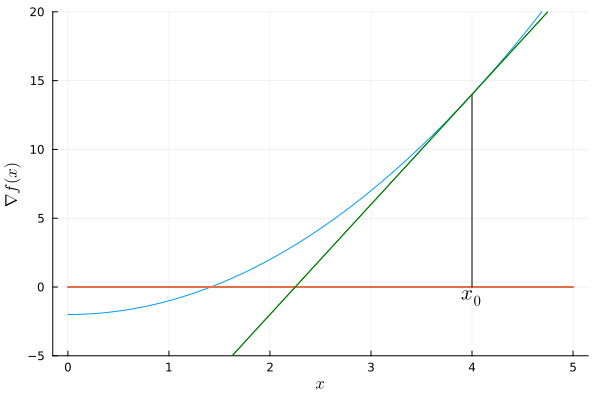

In [69]:
x = range(0,b, length=2)
∇²fun(x) = ForwardDiff.derivative(∇fun,x)
T(x) = ∇²fun(x₀)*(x-x₀) + ∇fun(x₀)
plot!(p2,x,T,color=:green) 
anim = @animate for nbit_max in 0:2
    if nbit_max == 0
        plot!(p2,x,Tofx,color=:green) 
    else
    Tol_Abs = sqrt(eps())
    options = [Tol_Abs, Tol_Abs, nbit_max]
    sol = algo_Newton(fun,x₀,options)
    println(sol)
    x_sol = sol[1]; fun_sol = sol[2]; ∇fun_sol = sol[3]; ∇²fun_sol = sol[4]; nbit = sol[5]
    T(x) = ∇²fun_sol*(x-x_sol) + ∇fun_sol
    plot!(p2,x,T, color=:green)
    plot!(p2,[x_sol,x_sol],[0,∇fun_sol], color=:black)
    end
end

plot(p1,p2)
gif(anim, "Newton.gif", fps=1)

### Application : datation par le C14
<div style="background:MistyRose">
<br>
 Nous allons ici voir un exemple d'application de l'algorithme de Newton.

Le carbone radioactif $^{14}C$ est produit dans
l'atmosphère par l'effet des rayons cosmiques sur l'azote
atmosphérique. Il est oxydé en $^{14}CO_{2}$ et absorbé sous
cette forme par les organismes vivants qui, par suite, contiennent un
certain pourcentage de carbone radioactif relativement aux carbones $^{12}C$
et $^{13}C\,$ qui sont stables. On suppose que la production de carbone $%
^{14}C$ atmosphérique est demeurée constante durant les derniers
millénaires. On suppose d'autre part que, lorsqu'un organisme meurt, ses
échanges avec l'atmosphère cessent et que la radioactivité due
au carbone $^{14}C\,$ décroit suivant la loi exponentielle suivante: 

$$
A(t)=A_{0}e^{-\lambda t}
$$

où $\lambda$ est une constante positive, $t$ représente le
temps en année, et $A(t)$ est la radioactivité exprimée en nombre
de désintégrations par minute et par gramme de carbone. 

On
désire estimer les paramètres $A_{0}$ et $\lambda $ par la
méthode des moindres carrés. Pour cela on analyse les troncs (le
bois est un tissu mort) de très vieux arbres "Sequoia gigantea" et 
"Pinus aristaca". Par un prélèvement effectué sur le tronc,
on peut obtenir:

- son âge $t$ en année, en comptant le nombre des anneaux de
croissance,

- sa radioactivité $A$ en mesurant le nombre de
désintégration.

Voici les données correspondantes:
$$
\begin{array}{||c|ccccccc||}\hline\hline
t & 500 & 1000 & 2000 & 3000 & 4000 & 5000 & 6300 \\ \hline 
A & 14.5 & 13.5 & 12.0 & 10.8 & 9.9 & 8.9 & 8.0\\ \hline\hline
\end{array}
$$

┌ Info: Saved animation to /Users/gergaud/Control/Publi/CFIES2022/slides/C14.gif
└ @ Plots /Users/gergaud/.julia/packages/Plots/kYFLA/src/animation.jl:149


Plots.AnimatedGif("/Users/gergaud/Control/Publi/CFIES2022/slides/C14.gif")
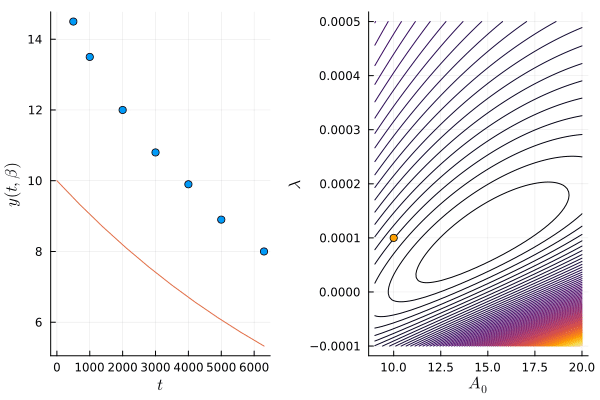

In [57]:
using DataFrames
# Carbonne 14
# Données
Ti = [ 500; 1000; 2000; 3000; 4000; 5000; 6300];
Ai = [14.5; 13.5; 12.0; 10.8;  9.9;  8.9;  8.0];
Data = [Ti Ai]
modele(t,β) = β[1]*exp(-β[2]*t)
res(β,Ti,Ai) = Ai - β[1]*exp.(-β[2]*Ti)
β0 = [10; 0.0001]; 
res(β0,Ti,Ai)
fun(β) = 0.5*sum(res(β,Ti,Ai).^2)
df_sol = DataFrame(nbit = Int[], A0 = Real[], λ = Real[], norm_∇f_β = Real[], f_β = Real[])
push!(df_sol,[0, β0[1], β0[2],NaN, NaN])
p_donnees = plot(Ti,Ai,seriestype = :scatter, xlabel=(L"t"), ylabel=(L"y(t,\beta)"), legend=false)


xmin = 9; xmax = 20;
x = range(xmin, xmax, length = 100);
ymin = -0.0001; ymax = 0.0005;
y = range(ymin, ymax, length = 100);
fun2(x,y) = fun([x;y])
p_contour = contour(x, y, fun2, levels = 100, xlabel=(L"A_0"), ylabel=(L"\lambda"), legend = false)

anim = @animate for nbit_max in 0:7
    if nbit_max == 0
        plot!(p_donnees,range(0,maximum(Ti),length=10),(t -> modele(t,β0)))
        plot!(p_contour,[β0[1]],[β0[2]], seriestype = :scatter, color=:orange)
    else
        Tol_Abs = sqrt(eps())
        options = [Tol_Abs, 1e-12, nbit_max]
        sol = algo_Newton(fun,β0,options)
        x_sol = sol[1]; fun_sol = sol[2]; ∇fun_sol = sol[3]; ∇²fun_sol = sol[4]; nbit = sol[5]
        push!(df_sol, (nbit, x_sol[1], x_sol[2], norm(∇fun_sol),fun_sol))
        plot!(p_donnees,range(0,maximum(Ti),length=10),(t -> modele(t,x_sol)))
    
        plot!(p_contour,df_sol[:,2],df_sol[:,3], color=:green)
        plot!(p_contour,df_sol[:,2],df_sol[:,3], seriestype = :scatter, color=:orange)
    end
    plot(p_donnees, p_contour)
end
#println(df_sol)
#plot(p_donnees)
gif(anim, "C14.gif", fps=1)

## Régression linéaire
### Estimation des paramètres par les moindres carrés
Données : Taux de cholestérol en fonction de l'âge

Equations normales : βhat₀, βhat₁ = 1.6395753816793903, 0.024909351145038148
\ de julia : βhat₀, βhat₁ = 1.639575381679389, 0.024909351145038172


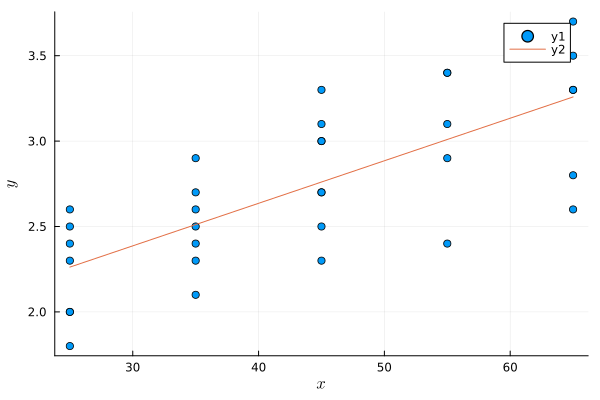

In [31]:
y=[1.8, 2.3, 2, 2.4, 2, 2.5, 2.6, 2.6, 2.9, 2.3, 2.4, 2.1, 2.5, 2.7, 2.7, 3, 3.1, 2.3, 2.5, 3, 3.3, 2.7, 3.1, 2.9, 3.4, 2.4, 3.4, 3.7, 2.8, 3.3, 3.5, 3.3, 2.6]
x=[25, 25, 25, 25, 25, 25, 25, 35, 35, 35, 35, 35, 35, 35, 45, 45, 45, 45, 45, 45, 45, 45, 55, 55, 55, 55, 55, 65, 65, 65, 65, 65, 65]
n = length(x)

X = [ones(n) x]

βhat₀, βhat₁ = (X'*X)\(X'*y)
βhat = [βhat₀, βhat₁]
println("Equations normales : βhat₀, βhat₁ = ", βhat₀, ", ", βhat₁)
βhat₀, βhat₁ = X\y
println("\\ de julia : βhat₀, βhat₁ = ", βhat₀, ", ", βhat₁)
p = plot(x,y, seriestype = :scatter, xlabel = (L"x"), ylabel = (L"y"))
plot!(p,x,βhat₀ .+ βhat₁*x)

In [32]:
r = y-X*βhat
σ²hat = sum(r.^2)/(n-2)
println(σ²hat)
VarB = σ²hat*inv(X'*X)

0.10866889312977103


2×2 Matrix{Float64}:
  0.0360977    -0.000749172
 -0.000749172   1.71091e-5

In [33]:
using DataFrames
using Statistics
using GLM
datas = DataFrame(age=x, chol = y)
lm1 = lm(@formula(chol ~ age), datas)
println(coef(lm1))
println(lm1)
covB = vcov(lm1)
#println("standard error = ", sdterror(lm1))
println("Covariance matrix = ", covB)
σ₀hat = sqrt(covB[1,1])
σ₁hat = sqrt(covB[2,2])
println("standard error of β = ", σ₀hat, ", ", σ₁hat)
# page 319

[1.639575381679391, 0.024909351145038124]
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

chol ~ 1 + age

Coefficients:
────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  1.63958    0.189994    8.63    <1e-09  1.25208    2.02707
age          0.0249094  0.00413632  6.02    <1e-05  0.0164733  0.0333454
────────────────────────────────────────────────────────────────────────
Covariance matrix = [0.03609767024885637 -0.000749172474105529; -0.000749172474105529 1.7109129166423845e-5]
standard error of β = 0.18999386897701823, 0.004136318310578121


### Simulation de la distribution des estimateurs de $\beta_0$ et $\beta_1$

Proportion de points dans l'ellipse : 0.9535


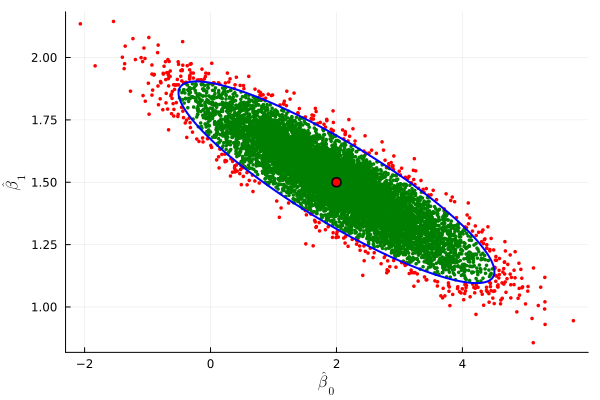

In [34]:
#using Random
#Random.seed!(0)   # initialisation pour la génération de nombres aléatoire
β₀, β₁ = 2.0, 1.5
β = [β₀, β₁]
σ = 1.5
n, N = 10, 10^4     # n = taille d'un échantillon, N = nombre d'échantillons
α = 0.05
xVals = collect(1:n) # retourne le vecteur [1,2,...,n]
X = [ones(n) xVals]
function  coefEst()
    yVals = β₀ .+ β₁*xVals +rand(Normal(0,σ),n)   # génération d'un échantillion
    data = DataFrame([xVals,yVals], [:x, :y])
    model = lm(@formula(y ~ x), data)
    return (coef(model))
end

ests = [coefEst() for _ in  1:N]    # gérération de N estimations des paramètres

# L'estimateur B de β est de loi N(β,Σ), Σ = σ^2(XᵀX)⁻¹
Σ⁻¹ = (1/σ^2)*X'*X
A = cholesky(Σ⁻¹).U # Y = A(B-β) est de loi N(0,I)
A⁻¹ = inv(A)
# le rayon d'une loi normale standard bidimentionnelle suit une loi de Rayleigh
r = quantile(Rayleigh(),1-α)  # Y₁² + Y₂² suit une loi du Khi2 à 2 ddl
isInEllipse(b) = norm(A*(b-β)) <= r
estIn = isInEllipse.(ests)

println("Proportion de points dans l'ellipse : ", sum(estIn)/N)
scatter(first.(ests[estIn]), last.(ests[estIn]), color = :green, ms=2, msw=0)
scatter!(first.(ests[.!estIn]), last.(ests[.!estIn]), color = :red, ms=2, msw=0)
# Calcul de l'ellipse frontière
ellipsePts = [r*A⁻¹*[cos(t),sin(t)] + β for t in 0:0.01:2*pi]
scatter!([β₀], [β₁], c=:red, ms=5, msw=2)
plot!(first.(ellipsePts), last.(ellipsePts), c=:blue, lw=2, legend=false,xlabel=L"\hat{\beta}_0", ylabel=L"\hat{\beta}_1")


## Package DifferentialEquations
Nous rappelons ici le lien vers la documentation du package 
[DifferentialEquations.jl](https://diffeq.sciml.ai/stable/tutorials/ode_example/)

### Pendule simple
#### Introduction
On s'intéresse ici au pendule simple. Les principes physiques de la mécanique classique donnent comme équation qui régit l'évolution du mouvement
$$ ml^2\ddot{\alpha}(t)+mlg\sin(\alpha(t)) + k\dot{\alpha}(t)=0,$$
où $\ddot{\alpha}(t)$ désigne la dérivée seconde de l'angle $\alpha$ par rapport au temps $t$. 

On prend ici comme variable d'état qui décrit le système $x(t)=(x_1(t),x_2(t))=(\alpha(t), \dot{\alpha}(t))$. Le système différentiel du premier ordre que l'on obtient s'écrit alors
$$
\left\{\begin{array}{l}
\dot{x}_1(t) = x_2(t)\\
\dot{x}_2(t) = -\frac{g}{l}\sin(x_1(t))-\frac{k}{ml^2}x_2(t)\\
x_1(0) = x_{0,1}=\alpha_0\\
x_2(0) = x_{0,2}=\dot{\alpha}_0
\end{array}\right.
$$

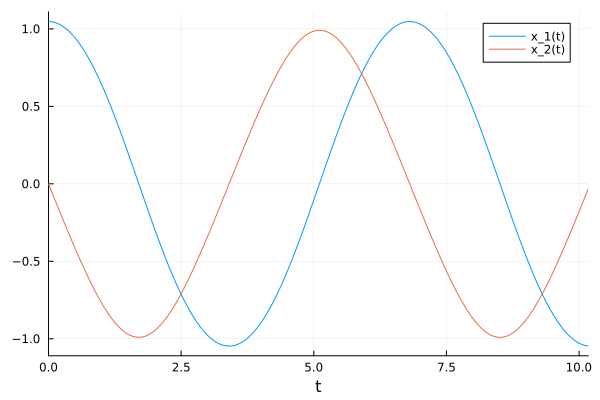

In [35]:
# Il nous faut tout d'abord importer les bons packages de Julia
using DifferentialEquations
using Plots

function pendule(x,p,t)
# second member of the IVP
# x : state
#     real(2)
# p : parameter vector
# t : time, variable not use here
#     real
# Output
# xpoint : vector of velocity
#          same as x
    g = p[1]; l = p[2]; k = p[3]; m = p[4]
    xpoint = similar(x)
    xpoint[1] = x[2]
    xpoint[2] = -(g/l)*sin(x[1]) - (k/(m*l^2))*x[2]
    return xpoint
end

#println(typeof(g))
# Main
#
g = 9.81; l = 10; k = 0; m = 1;
p = [g,l,k,m]      # constantes
#p = [9.81, 10,0,1]
theta0 = pi/3
t0 = 0.
tf = 3*pi*sqrt(l/g)*(1 + theta0^2/16 + theta0^4/3072) # 2*approximation de la période
tspan = (t0,tf)                                       # instant initial et terminal
x0 = [theta0,0]                                       # état initial
prob = ODEProblem(pendule,x0,tspan,p)                 # défini le problème en Julia
sol = solve(prob)                                     # réalise l'intégration numérique
plot(sol, label = ["x_1(t)" "x_2(t)"])  

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


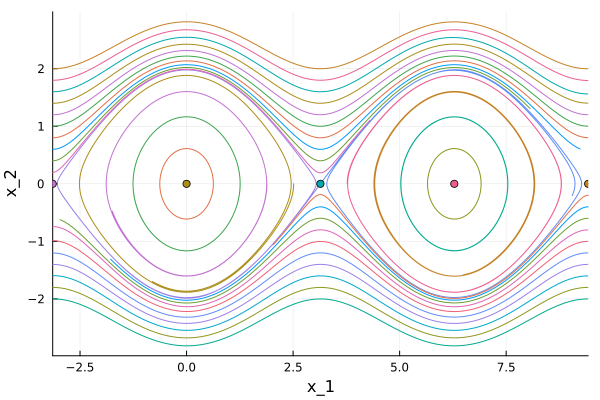

In [36]:
# Diagramme de phase
#
g = 9.81; l = 10; k = 0; m = 1; k=
0 # k = 10.
p = [g,l,k,m]      # constantes
plot()
for theta0 in 0:(2*pi)/10:2*pi
    theta0_princ = theta0
    tf = 3*pi*sqrt(l/g)*(1 + theta0_princ^2/16 + theta0_princ^4/3072) # 2*approximation of the period
    tspan = (0.0,tf)
    x0 = [theta0 0]
    prob = ODEProblem(pendule,x0,tspan,p)
    sol = solve(prob)
    plot!(sol,vars=(1,2), xlabel = "x_1", ylabel = "x_2", legend = false)  # lw = linewidth
end
theta0 = pi-10*eps()
x0 = [theta0 0]
tf = 70                                                                  # problem for tf=50 1/4 of the period!
tspan = (0.0,tf)
prob = ODEProblem(pendule,x0,tspan,p)
sol = solve(prob)
plot!(sol,vars=(1,2), xlims = (-2*pi,4*pi), xlabel = "x_1", ylabel = "x_2", legend = false)  # lw = linewidth

theta0 = pi+10*eps()
x0 = [theta0 0]
tf = 70
tspan = (0.0,tf)
prob = ODEProblem(pendule,x0,tspan,p)
sol = solve(prob)
plot!(sol,vars=(1,2), xlims = (-2*pi,4*pi), xlabel = "x_1", ylabel = "x_2", legend = false)  # lw = linewidth

# circulation case
for thetapoint0 in 0:0.2:2         
    tf = 10
    tspan = (0.,tf)
    x0 = [-pi thetapoint0]                # thetapoint0 > 0 so theta increases from -pi to ...
    prob = ODEProblem(pendule,x0,tspan,p)
    sol = solve(prob)
    plot!(sol,vars=(1,2), xlabel = "x_1", ylabel = "x_2", legend = false)  # lw = linewidth
end
for thetapoint0 in -2:0.2:0
    tf = 10
    tspan = (0.,tf)
    x0 = [3*pi thetapoint0]              # thetapoint0 < 0 so theta decreases from 3pi to ...
    prob = ODEProblem(pendule,x0,tspan,p)
    sol = solve(prob)
    plot!(sol,vars=(1,2), xlabel = "x_1", ylabel = "x_2", legend = false)  # lw = linewidth
end
plot!([-pi 0 pi 2*pi 3*pi], [0 0 0 0 0], seriestype=:scatter)
plot!(xlims = (-pi,3*pi))

## Performance
`Julia` fait de la compilation à la volée : Just-In-Time compilation

In [37]:
x = rand(1000)

function sum_global()
    s = 0.0
    for i in x
        s +=i
    end
    return s
end
println("x variable globale")
@time sum_global()
@time sum_global()
println()     # pour ne pas imprimer la dernière exécution

println("x en argument")
function sum_arg(x)
    s = 0.0
    for i in x
        s +=i
    end
    return s
end
@time sum_arg(x)
@time sum_arg(x)
println()     # pour ne pas imprimer la dernière exécution

x variable globale
  0.026855 seconds (3.64 k allocations: 77.156 KiB, 98.99% compilation time)
  0.000137 seconds (3.49 k allocations: 70.156 KiB)

x en argument
  0.007270 seconds (3.96 k allocations: 193.953 KiB, 99.74% compilation time)
  0.000010 seconds (1 allocation: 16 bytes)



#### Passage des paramètres de type scalaire ou tuple
**Les paramètres de type scalaire ou tuple sont en entrée**

In [38]:
function fct2(a,b)
    b = a
    println("Dans fct2")
    println("a, b =", a, ", ", b)
    return b
end
a = 0
b = 1
println("Avant fct2")
println("a, b =", a, ", ", b)
c = fct2(a,b)
println("Après fct2")
println("a, b =", a, ", ", b)

Avant fct2
a, b =0, 1
Dans fct2
a, b =0, 0
Après fct2
a, b =0, 1


#### Passage des paramètres de type Array
**Les paramètres sont passés par référence**

In [39]:
function fct3(a,b)
    b[1] = a[1]
    b[2] = a[2]
    println("Dans fct3")
    println("a, b =", a, ", ", b)
    return b                 
end
a = [0,0]
b = [1,1]
println("Avant fct3")
println("a, b =", a, ", ", b)
c = fct3(a,b)
println("Après fct3")
println("a, b =", a, ", ", b)
c[1]=10
println("a, b, c =", a, ", ", b, ", ", c)

Avant fct3
a, b =[0, 0], [1, 1]
Dans fct3
a, b =[0, 0], [0, 0]
Après fct3
a, b =[0, 0], [0, 0]
a, b, c =[0, 0], [10, 0], [10, 0]


**b a été modifié**

**b et c sont les mêmes objets**

**a et b ne sont pas les mêmes objet**

#### Convention !
**Ce n'est qu'une convention**

In [40]:
function fct4(x)
    x[1]=2
    return x
end
function fct5!(x)
       x[1]=3
    return x
end
a=[10]
println("fct4(a) = ", fct4(a))
println("a = ", a)
println("fct5!(a) = ", fct5!(a))
println("a = ", a)

fct4(a) = [2]
a = [2]
fct5!(a) = [3]
a = [3]
